#HW1 - Data Exploration and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loading the dataset

In [2]:
from prepare import prepare_data

dataset = pd.read_csv("./virus_data.csv")
train, test = train_test_split(dataset, test_size=0.2 , train_size = 0.8 , random_state=20  )
train_prep = prepare_data(train, train)
test_prep = prepare_data(train, test)

In [3]:
dataset.shape

(1250, 25)

In [11]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


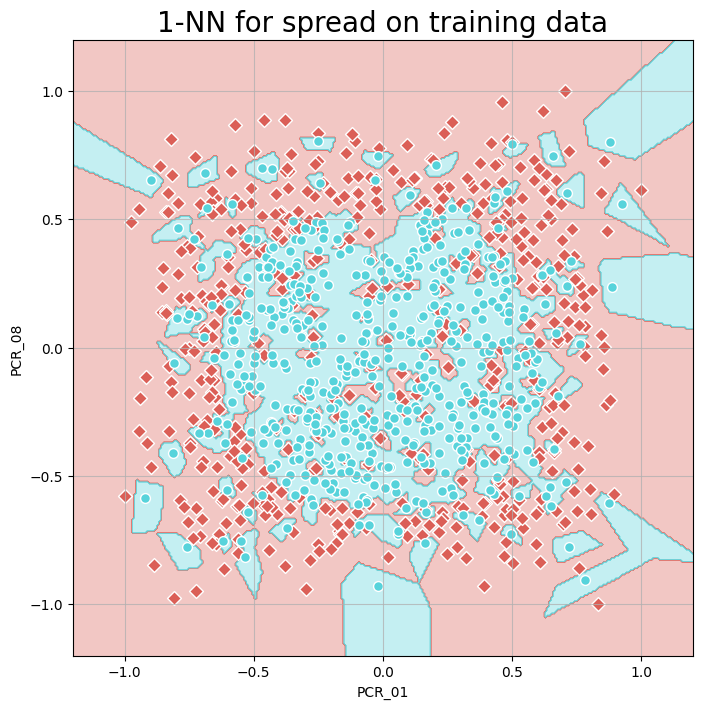

train data accuracy:
1.0


C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


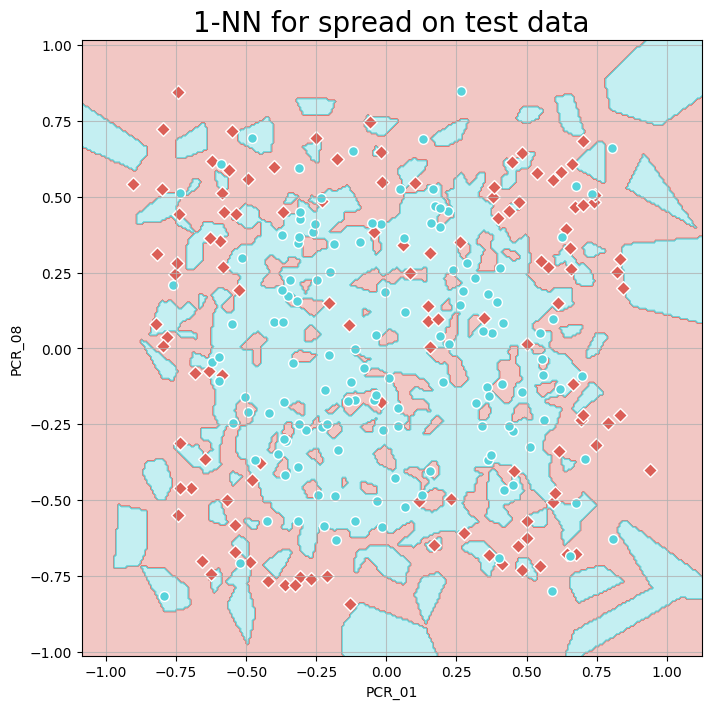

train data accuracy:
0.708


In [20]:
#part 1
from sklearn.neighbors import KNeighborsClassifier

#task
pcr18_train = pd.DataFrame(train_prep, columns=['PCR_01', 'PCR_08'])
pcr18_test = pd.DataFrame(test_prep, columns=['PCR_01', 'PCR_08'])
spread_train = pd.DataFrame(train_prep, columns=['spread'])
spread_test = pd.DataFrame(test_prep, columns=['spread'])

#Q1
oneNN = KNeighborsClassifier(n_neighbors=1)
oneNN.fit(X=pcr18_train, y=spread_train)

visualize_clf(oneNN, pcr18_train, spread_train, '1-NN for spread on training data', 'PCR_01', 'PCR_08')
print("train data accuracy:")
print(oneNN.score(X=pcr18_train, y=spread_train))
visualize_clf(oneNN, pcr18_test, spread_test, '1-NN for spread on test data', 'PCR_01', 'PCR_08')
print("train data accuracy:")
print(oneNN.score(X=pcr18_test, y=spread_test))


In [42]:
#Q2
from sklearn.model_selection import cross_validate

test_mean_list = []
train_mean_list = []
for k in list(range(1,20,2))+list(range(20,695,65)):
    kNN = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(kNN, pcr18_train, spread_train['spread'], cv=8, return_train_score=True)
    
    test_mean = cv_results['test_score'].mean()
    train_mean = cv_results['train_score'].mean()
    
    test_mean_list.append(test_mean)
    train_mean_list.append(train_mean)




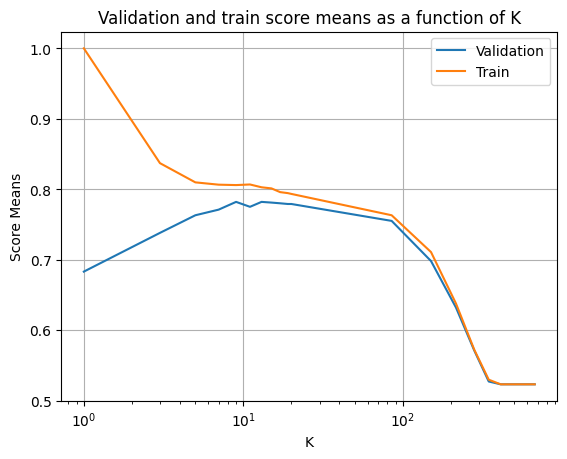

In [59]:
plt.semilogx(list(range(1,20,2))+list(range(20,695,65)), test_mean_list, label='Validation')
plt.semilogx(list(range(1,20,2))+list(range(20,695,65)), train_mean_list, label='Train')
plt.title('Validation and train score means as a function of K')
plt.xlabel('K')
plt.ylabel('Score Means')
plt.grid()
plt.legend()
plt.show()

#Best k is 9, for which average training accuracy is ~81% and average testing accuracy is ~78%. K values under 3 cause overfitting because the decision areas are based on very few neighbors and so can be easily swayed by outliers (high complexity). Underfitting occurs at k values above 200 as decision areas become extremely smooth and the classifier becomes very simple

C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


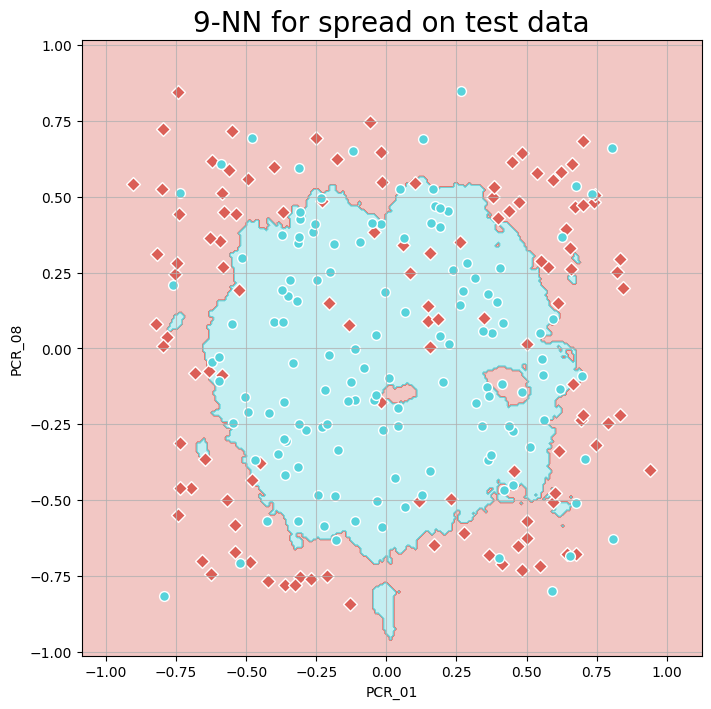

train data accuracy:
0.8


In [66]:
#Q3
kNN = KNeighborsClassifier(n_neighbors=9)
kNN.fit(X=pcr18_train, y=spread_train)

# visualize_clf(kNN, pcr18_train, spread_train, '9-NN for spread on training data', 'PCR_01', 'PCR_08')
#print("train data accuracy:")
#print(kNN.score(X=pcr18_train, y=spread_train))
visualize_clf(kNN, pcr18_test, spread_test, '9-NN for spread on test data', 'PCR_01', 'PCR_08')
print("train data accuracy:")
print(kNN.score(X=pcr18_test, y=spread_test))

In [ ]:
#The decision areas in the 1-NN model are numerous and sporadic, with lower test accuracy than the 9-NN model as overfitting occurs. The 9-NN model's decision areas are larger and fewer, with most of the middle area classified as positive spread and less 'positive spread' areas on the outer boundaries of the graph.